In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

from scipy.integrate import odeint
from sklearn.linear_model import LinearRegression

i= 0
slope= 1.0
standard error= 0.0
i= 1
slope= 1.999998736792527
standard error= 2.845560817213345e-07
i= 2
slope= 2.999333657455123
standard error= 0.00011243441145573091
i= 3
slope= 3.9574908328129186
standard error= 0.004497145510225483
i= 4
slope= 4.584708000849625
standard error= 0.022315945451187917
i= 5
slope= 4.754881312011671
standard error= 0.03239421843434379
i= 6
slope= 4.780036298356246
standard error= 0.03413906892518561
i= 7
slope= 4.783255524790743
standard error= 0.03436738228286067
i= 8
slope= 4.783716912739025
standard error= 0.03440022624674888
i= 9
slope= 4.7837173411678595
standard error= 0.03440033483768876
[1.0, 1.999998736792527, 2.999333657455123, 3.9574908328129186, 4.584708000849625, 4.754881312011671, 4.780036298356246, 4.783255524790743, 4.783716912739025, 4.7837173411678595]


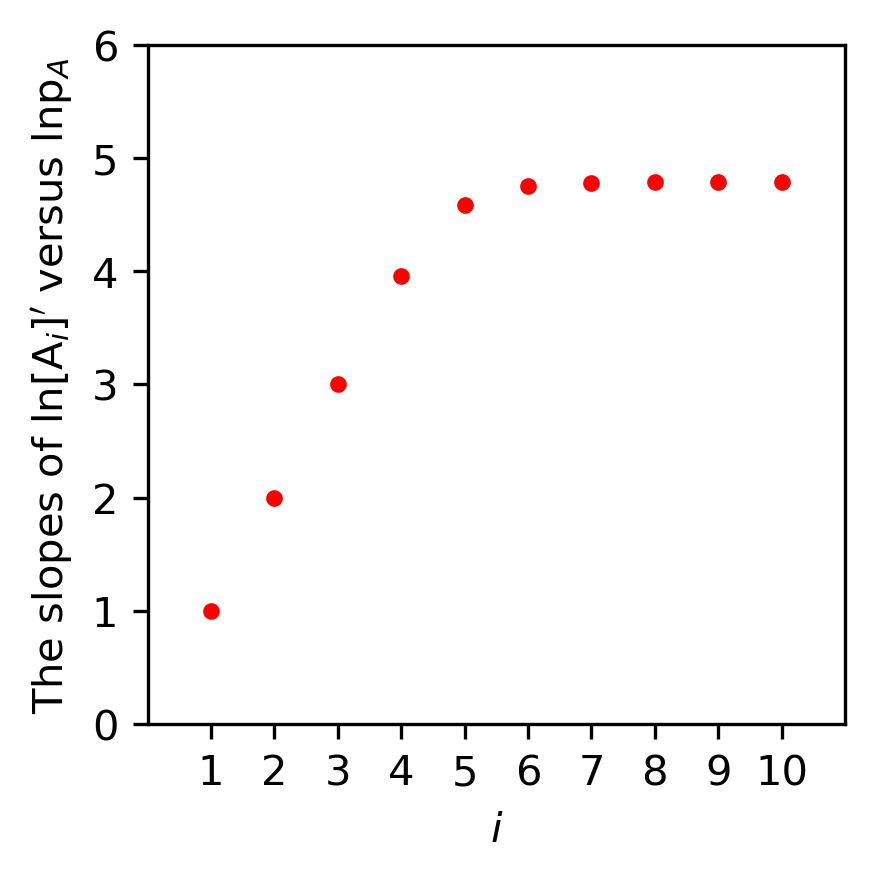

In [2]:
slope=[]  # slope is used to store the slopes of ln[Ai]' versus lnpA (variable c in the code) of clusters of size i (variable m in the code)
for m  in range(0,10): 
    ki_forward=1        # ki_forward represents the forward rate at step i of attaching a motif
    ki_backward=[0]     # ki_backward represents the backward rate at step i of detaching a motif
    for a in range(1,9):         
        ki_backward.append(8**(4-a))    
    ki_backward.append(0)
    len_ki_backward=len(ki_backward)
    # print("ki_backward=",ki_backward)
    # print("length of ki_backward=",len_ki_backward)

    kAiB_backward=[1E6]*len_ki_backward    
    kAiB_backward[0]=0
    len_kAiB_backward=len(kAiB_backward)

    k_backward=ki_backward
    k_backward.extend(kAiB_backward)
    len_k_backward=len(k_backward)
    # print("kAiB_backward=",kAiB_backward)
    # print("length of kAiB_backward=",len_kAiB_backward)
    # print("k_backward=",k_backward)
    # print("length of k_backward=",len_k_backward)


    t=0
    list1=[]     # list1 is used to store the logarithm of the concentration c of crystallizable units in the system
    list2=[]     # list2 is used to store the logarithm of the nucleation flux of the system represented by the formation flux of clusters A10, J'=[A9]*ki_forward*c
    for c in np.arange(1,0.2,-0.1):    # c represents the concentration pA of crystallizable units in the system
        matrix=np.zeros((len_k_backward,len_k_backward))
        for i in range(len_k_backward):           
            for j in range(len_k_backward):
                if i in range(0,len_ki_backward) and j in range(0,len_ki_backward):
                    if i==j:
                        matrix[i][j]=-k_backward[i]-1
                    if i==j-1:
                        matrix[i][j]=k_backward[j]
                    if i==j+1:
                        matrix[i][j]=c
                    if i==0:
                        matrix[i][j]=0
                    if i==len_ki_backward-2 and j==len_ki_backward-1: 
                        matrix[i][j]=0
                    if i==len_ki_backward-1 and j==len_ki_backward-1:
                        matrix[i][j]=-c
                if i in range(0,len_ki_backward) and j in range(len_ki_backward,len_k_backward):
                    if i==j-(len_ki_backward+1):
                        matrix[i][j]=k_backward[j]
                    if i==0:
                        matrix[i][j]=0
                if i in range(len_ki_backward,len_k_backward) and j in range(0,len_ki_backward):
                    if i==j+(len_ki_backward+1):
                        matrix[i][j]=(1-c)   
                if i in range(len_ki_backward,len_k_backward) and j in range(len_ki_backward,len_k_backward):
                    if i==j:
                        matrix[i][j]=-k_backward[j]-k_backward[j-len_ki_backward-1]-c
                    if i==len_ki_backward+1 and j==len_ki_backward+1:
                        matrix[i][j]=-k_backward[j]-c
                    if i==j+1:
                        matrix[i][j]=c
                    if i==j-1:
                        matrix[i][j]=k_backward[i-len_ki_backward]
                    if i==len_ki_backward:
                        matrix[i][j]=0
                    if j==len_ki_backward:
                        matrix[i][j]=0
        t=t+1
        
        init_y=np.zeros_like(k_backward)
        init_y[0]=c
        init_y[len_ki_backward]=1-c
        # print("init_y")
        # print(init_y)

        def diff_func(y, g):
            return matrix.dot(y)
        
        x = np.linspace(0, 1000, 1000)
        y = odeint(diff_func, init_y, x)

        list1.append(np.log(c))
        list2.append(np.log(y[-1,m]))    


    # plt.figure(figsize=(4,3.5),dpi=500)
    # plt.plot(list1,list2,"r .")
    fit_result=st.linregress(list1,list2)
    # print("lnpA=",list1)
    # print("lnJ'=",list2)
    print("i=",m)
    print("slope=",fit_result[0])
    slope.append(fit_result[0])
    print("standard error=",fit_result[-1])
    # fit_y=fit_result.slope*np.asarray(list1)+fit_result.intercept
    # plt.plot(list1,fit_y,"--")
    # plt.xlabel(r'ln$p_\mathrm{A}$',fontsize=8.5)
    # plt.ylabel("ln$\it{J'}$",fontsize=8.5)
    # plt.rcParams["xtick.direction"]="out"
    # plt.rcParams["ytick.direction"]="out"

print(slope)
size=[1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(3,3),dpi=300)
plt.xlim([0,11])
plt.xticks(range(1,11,1))
plt.ylim([0,6])
plt.xlabel("$i$")
plt.ylabel("The slopes of ln[A$_i$]$'$ versus lnp$_A$")
plt.plot(size,slope,"r.")